In [82]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)

In [4]:
originalDataFrame = pd.read_csv("Bengaluru_House_Data.csv")
originalDataFrame.shape

(13320, 9)

In [6]:
dataFrame01 = originalDataFrame.drop(['area_type', 'society', 'balcony', 'availability'], axis = 'columns')
dataFrame01.head(10)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
5,Whitefield,2 BHK,1170,2.0,38.00
6,Old Airport Road,4 BHK,2732,4.0,204.00
7,Rajaji Nagar,4 BHK,3300,4.0,600.00
8,Marathahalli,3 BHK,1310,3.0,63.25
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00


In [8]:
dataFrame01.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
dataFrame01 = dataFrame01.dropna()
dataFrame01.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
def splitting():
    return (lambda x : int(x.split(' ')[0]))

dataFrame01['bhk'] = dataFrame01['size'].apply(splitting())
dataFrame01.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [14]:
dataFrame01.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
def checkIfFloat(value):
    try:
        float(value)
    except:
        return False
    return True

dataFrame01[~(dataFrame01['total_sqft'].apply(checkIfFloat))]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [21]:
def findAverage(value):
    nums = value.split('-')
    if (len(nums) == 2):
        return (float(nums[0]) + float(nums[1])) / 2
    try:
        return float(value)
    except:
        return None

In [23]:
dataFrame02 = dataFrame01.copy()
dataFrame02['total_sqft'] = dataFrame02['total_sqft'].apply(findAverage)
dataFrame02.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [25]:
dataFrame02.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [36]:
dataFrame04 = dataFrame02.copy()
dataFrame04['price_per_sqft'] = (100000 * dataFrame04['price']) / dataFrame04['total_sqft']
dataFrame04.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [39]:
dataFrame04.location = dataFrame04.location.apply(lambda x : x.strip())
locationStatistics = dataFrame04.groupby('location')['location'].agg('count').sort_values(ascending = False)
locationStatistics

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [41]:
len(locationStatistics[locationStatistics <= 10])

1052

In [43]:
locationStatsLessThanTen = locationStatistics[locationStatistics <= 10]
locationStatsLessThanTen

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [49]:
dataFrame05 = dataFrame02.copy()
dataFrame05['price_per_sqft'] = (100000 * dataFrame05['price']) / dataFrame05['total_sqft']
dataFrame05.location = dataFrame05.location.apply(lambda x : x.strip())
locationStatistics = dataFrame05.groupby('location')['location'].agg('count').sort_values(ascending = False)
locationStatsLessThanTen = locationStatistics[locationStatistics <= 10]
len(dataFrame05.location.unique())

1293

In [52]:
dataFrame05.location = dataFrame05.location.apply(lambda x : 'other' if x in locationStatsLessThanTen else x)
len(dataFrame05.location.unique())

242

In [54]:
dataFrame06 = dataFrame05.copy()
dataFrame05.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [56]:
dataFrame05[dataFrame05['total_sqft'] / dataFrame05['bhk'] < 300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [59]:
dataFrame07 = dataFrame05[~(dataFrame05['total_sqft'] / dataFrame05['bhk'] < 300)]
dataFrame07.shape

(12502, 7)

In [62]:
dataFrame07.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [64]:
dataFrame07.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [68]:
def removePriceOutliers(df):
    dataFrame_out = pd.DataFrame()
    for key, sub_df in df.groupby('location'):
        _mean = np.mean(sub_df.price_per_sqft)
        _std = np.std(sub_df.price_per_sqft)
        reduced_df = sub_df[(sub_df.price_per_sqft > (_mean - _std)) & (sub_df.price_per_sqft <= (_mean + _std))]
        dataFrame_out = pd.concat([dataFrame_out, reduced_df], ignore_index = True)
    return dataFrame_out
dataFrame08 = removePriceOutliers(dataFrame07)
dataFrame08.shape

(10241, 7)

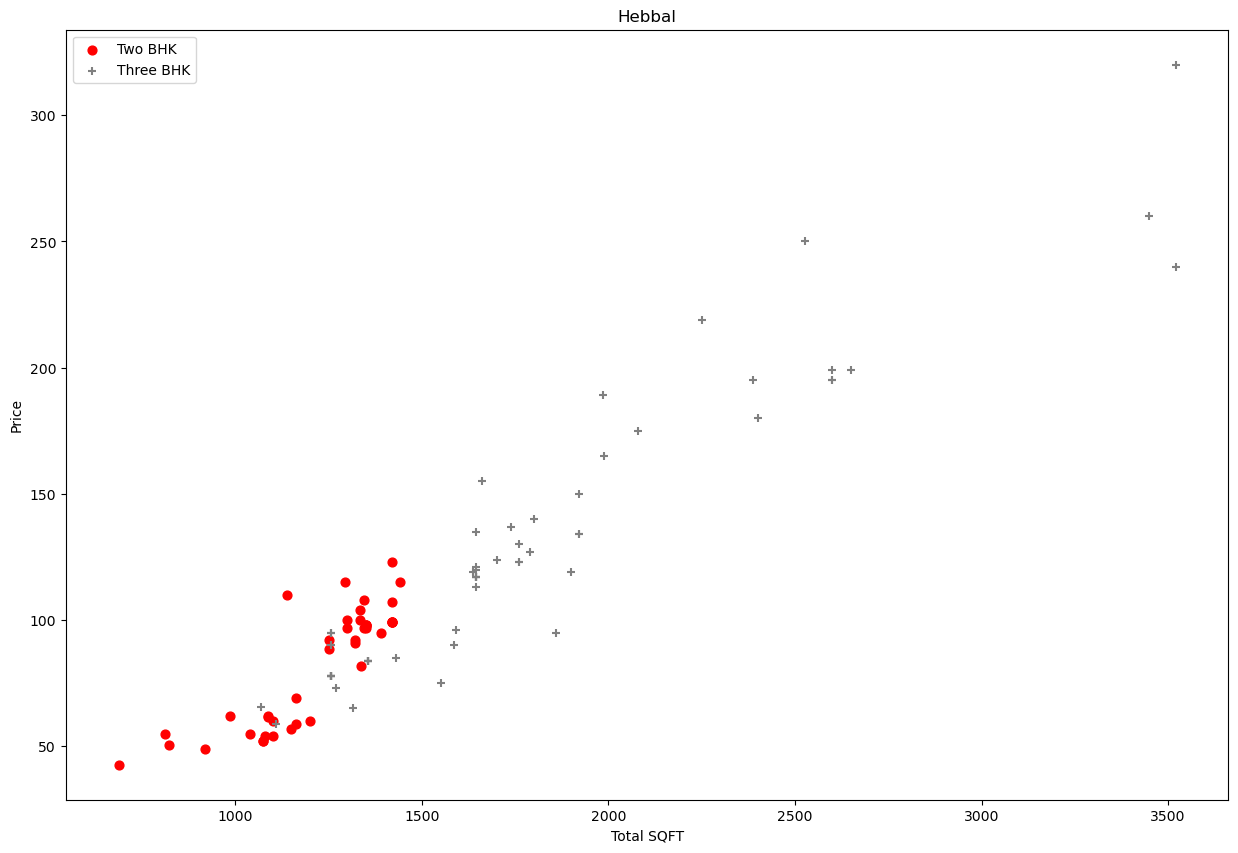

In [93]:
def bhk_price_location_graph(location, dataFrame):
    twoBHK = dataFrame[(dataFrame.location == location) & (dataFrame.bhk == 2)]
    threeBHK = dataFrame[(dataFrame.location == location) & (dataFrame.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(twoBHK.total_sqft, twoBHK.price, color = 'red', label = 'Two BHK', s = 40)
    plt.scatter(threeBHK.total_sqft, threeBHK.price, marker = '+', color = 'grey', label = 'Three BHK', s = 40)
    plt.ylabel('Price')
    plt.xlabel('Total SQFT')
    plt.title(location)
    plt.legend()
    
bhk_price_location_graph("Hebbal", dataFrame08)

In [94]:
def remove_bhk_price_outliers(dataFrame):
    excluded = np.array([])
    for location, location_df in dataFrame.groupby('location'):
        bhkStats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhkStats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhkStats.get(bhk - 1)
            if (stats and stats['count'] > 5):
                excluded = np.append(excluded, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return dataFrame.drop(excluded, axis = 'index')

dataFrame09 = remove_bhk_price_outliers(dataFrame08)
dataFrame09.shape

(7329, 7)

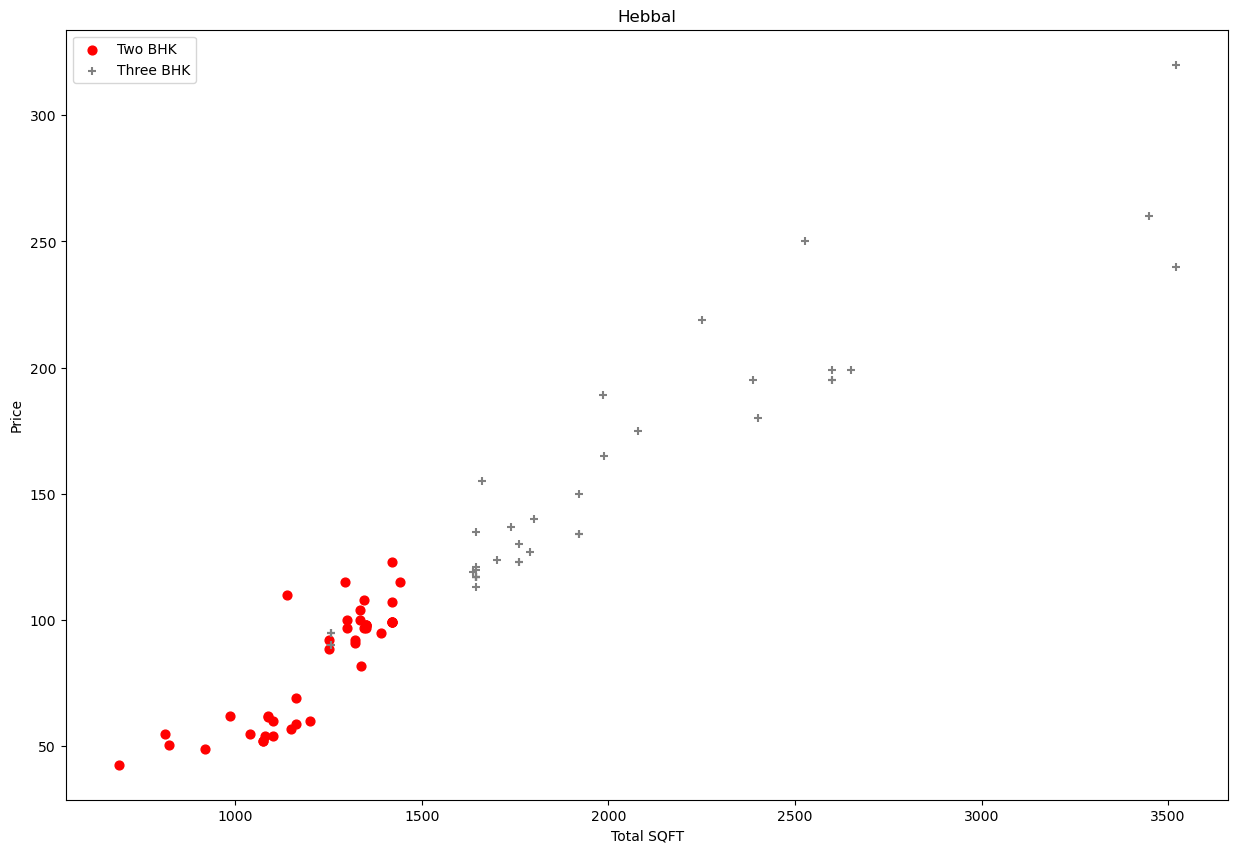

In [97]:
bhk_price_location_graph("Hebbal", dataFrame09)

Text(0.5, 0, 'Price Per SQFT')

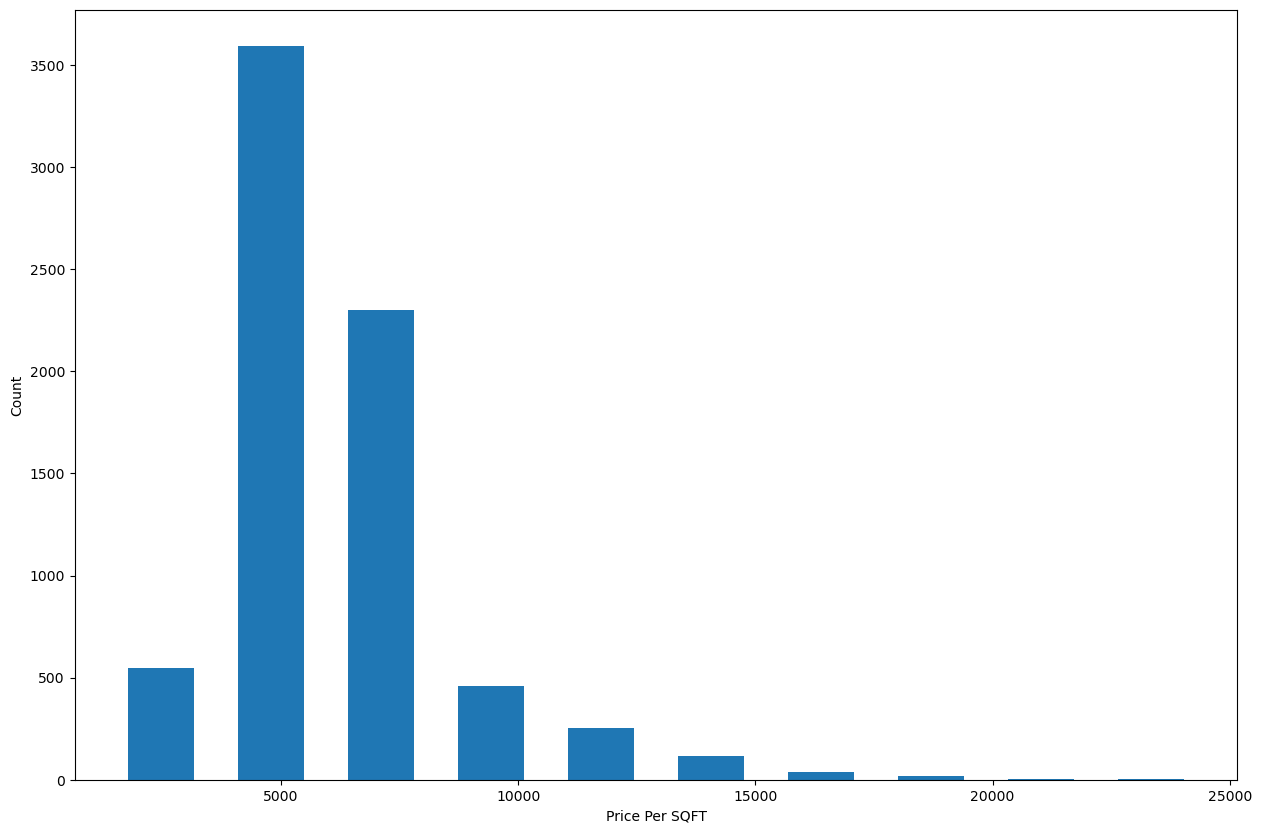

In [100]:
plt.hist(dataFrame09.price_per_sqft, rwidth = 0.6)
plt.ylabel("Count")
plt.xlabel('Price Per SQFT')

In [102]:
dataFrame09.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [127]:
dataFrame10 = dataFrame09[dataFrame09.bath < dataFrame09.bhk + 2]
dataFrame10.shape

(7251, 7)

In [129]:
dataFrame10.shape

(7251, 7)

In [131]:
finalDataFrame = dataFrame10.drop(['size', 'price_per_sqft'], axis = 'columns')
finalDataFrame.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [175]:
dummies = pd.get_dummies(finalDataFrame.location)
dummies = dummies.replace({False: 0, True: 1})
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [179]:
df11 = pd.concat([finalDataFrame, dummies.drop('other', axis = 'columns')], axis = 'columns')
df11.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [184]:
df12 = df11.drop('location', axis = 'columns')
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [190]:
independent = df12.drop('price', axis = 'columns') #x
independent.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [192]:
dependent = df12.price #y
dependent.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [194]:
from sklearn.model_selection import train_test_split
independent_train, independent_test, dependent_train, dependent_test = train_test_split(independent, dependent, test_size = 0.2, random_state = 10)
#20% testing 80% training

In [201]:
from sklearn.linear_model import LinearRegression
linearReg = LinearRegression()
linearReg.fit(independent_train, dependent_train) #The model is trained here.
linearReg.score(independent_test, dependent_test)

0.8452277697874321

In [212]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

crossValue = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)

cross_val_score(LinearRegression(), independent, dependent, cv = crossValue)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [229]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

#This method is used to find the best model to train.
#Taken from codebasics Youtube channel with chatGPT modifications.
def findBestModelUsingGridSearchCV(independent, dependent):
    algorithms = {
        'Linear Regression': {
            'model': LinearRegression(),
            'parameters': {
            }
        },
        'Lasso': {
            'model': Lasso(),
            'parameters': {
            }
        },
        'Decision Tree': {
            'model': DecisionTreeRegressor(),
            'parameters': {
            }
        }
    }
    scoreList = []
    crossValue = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algorithm, config in algorithms.items():
        gridSearch = GridSearchCV(config['model'], config['parameters'], cv=crossValue, return_train_score=False)
        gridSearch.fit(independent, dependent)
        scoreList.append({
            'model': algorithm,
            'bestScore': gridSearch.best_score_,
            'bestParameters': gridSearch.best_params_
        })
    return pd.DataFrame(scoreList, columns=['model', 'bestScore'])

findBestModelUsingGridSearchCV(independent, dependent)

,model,bestScore
0,Linear Regression,0.818354
1,Lasso,0.687429
2,Decision Tree,0.723455


In [231]:
independent.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [234]:
np.where(independent.columns == '5th Block Hbr Layout')[0][0]

7

In [243]:
def predictPrice(location, sqft, bath, bhk):
    locationIndex = np.where(independent.columns == location)[0][0]
    
    xValue= np.zeros(len(independent.columns))
    xValue[0] = sqft
    xValue[1] = bath
    xValue[2] = bhk
    if locationIndex >= 0:
        xValue[locationIndex] = 1
        
    return linearReg.predict([xValue])[0]

In [237]:
independent.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [245]:
predictPrice('1st Phase JP Nagar', 1000, 2, 2)

/Users/laithalmasri/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.49904677183869

In [247]:
predictPrice('1st Phase JP Nagar', 1000, 3, 3)

/Users/laithalmasri/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.80519395210526

In [249]:
predictPrice('Indira Nagar', 1000, 2, 2)

/Users/laithalmasri/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


181.2781548400676

In [251]:
predictPrice('Indira Nagar', 1000, 3, 3)

/Users/laithalmasri/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


184.58430202033423

In [254]:
#for exporting the model
import pickle 
with open('real_estate_price_model.pickle', 'wb') as func: 
    pickle.dump(linearReg, func)

In [255]:
import json
columns = {
    'Data Columns' : [column.lower() for column in independent.columns]
}
with open ('columns.json', 'w') as func:
    func.write(json.dumps(columns))